# Importing

## Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import time
import random
import math

## Importing own 

In [2]:
from generateSpace import *
from plotLattice import *
from getTriangleLengths import *
from potentialEnergyPerTrio import *
from potentialEnergy import *
from potentialEnergyPerParticle import *
from numberOfCalculations import *
from makeRandomDatabase import *

# Generating data

If you want to use multiprocessing to speed up the procces you should run runDatabaseGeneration.py instead of this notebook. This notebook is more for playing with the data then actualy generating it.

## Generating data

In [3]:
numberOfDatapoints = 50
numberOfSurroundingCells = 4
numberOfParticlesPerCell = 4
potentialEnergyFunction = potentialEnergyPerTrio# Set the potential energy function of the data base as a function
widthOfCell = [1.0, 1.0]# The width of a singe cell.
filename = 'test'# Name of the file in which the data will be stored, set to a boolean if you don't want to store the data.

In [4]:
data = makeRandomDatabase(numberOfDatapoints, numberOfSurroundingCells, numberOfParticlesPerCell, potentialEnergyFunction, widthOfCell, filename)

Predicted amount of calculations: 10304200 for  50 datapoints.
Assuming 15 us per calculation, estimated time needed: 155 seconds
  2 % done, time left 152 seconds, 3 seconds since start.
  4 % done, time left 149 seconds, 6 seconds since start.
  6 % done, time left 146 seconds, 8 seconds since start.
  8 % done, time left 143 seconds, 11 seconds since start.
 10 % done, time left 140 seconds, 14 seconds since start.
 12 % done, time left 137 seconds, 16 seconds since start.
 14 % done, time left 133 seconds, 19 seconds since start.
 16 % done, time left 130 seconds, 22 seconds since start.
 18 % done, time left 127 seconds, 24 seconds since start.
 20 % done, time left 124 seconds, 27 seconds since start.
 22 % done, time left 121 seconds, 29 seconds since start.
 24 % done, time left 118 seconds, 32 seconds since start.
 26 % done, time left 115 seconds, 35 seconds since start.
 28 % done, time left 112 seconds, 37 seconds since start.
 30 % done, time left 109 seconds, 40 seconds s

## Inspecting file

If no file is saved this part is supposed to crash so don't worry.

In [5]:
dataRead = pd.read_json(filename + '.json', orient='columns')
dataRead['particleCoordinates'] = dataRead['particleCoordinates'].apply(np.array)

dataRead.head()

"""
data = dataRead
#"""

'\ndata = dataRead\n#'

## Inspecting data

In [6]:
data.head()

,particleCoordinates,widthOfCell,numberOfSurroundingCells,potentialEnergy
0,"[[0.9785807648511469, 0.11774015447256725], [0...",1.0,4,5.374375e+09
1,"[[0.9246999019488906, 0.6918555059691741], [0....",1.0,4,6.008844e+08
2,"[[0.18323623301474856, 0.10972362681544834], [...",1.0,4,1.637922e+14
3,"[[0.7688611982251051, 0.9446270105523137], [0....",1.0,4,4.311072e+08
4,"[[0.37300016052115226, 0.6834514543063972], [0...",1.0,4,9.210410e+08


In [7]:
data.describe()

,widthOfCell,numberOfSurroundingCells,potentialEnergy
count,50.0,50.0,5.000000e+01
mean,1.0,4.0,3.390125e+12
std,0.0,0.0,2.315478e+13
min,1.0,4.0,2.802768e+06
25%,1.0,4.0,1.091262e+08
50%,1.0,4.0,5.159958e+08
75%,1.0,4.0,1.501494e+10
max,1.0,4.0,1.637922e+14


Plotting datapoint  0  with energy  5374374954.858058


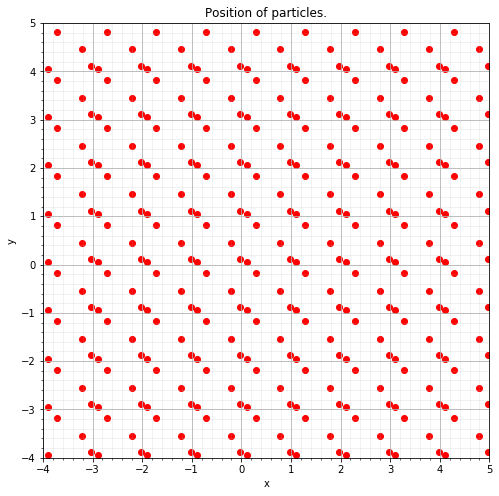

Plotting datapoint  1  with energy  600884396.3948438


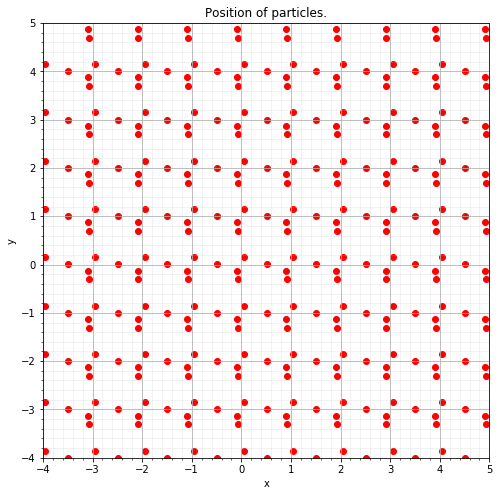

Plotting datapoint  2  with energy  163792235413450.62


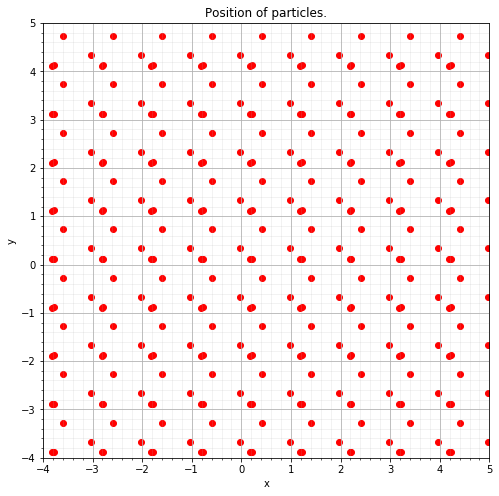

Plotting datapoint  3  with energy  431107208.71490306


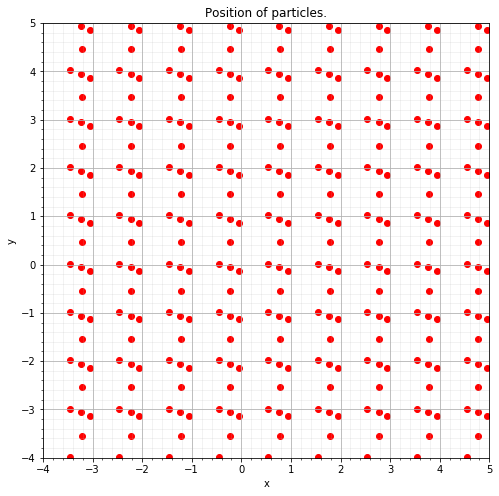

Plotting datapoint  4  with energy  921041000.2837247


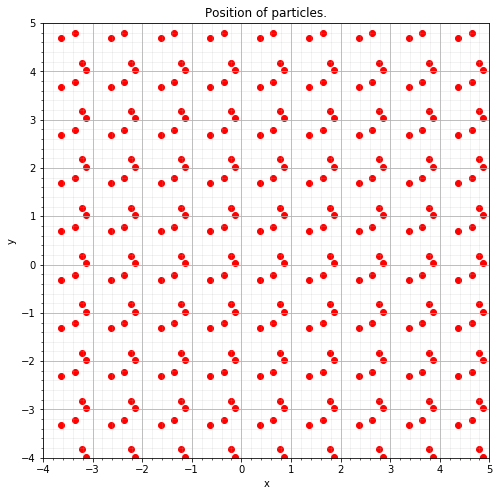

Plotting datapoint  5  with energy  42124592.95231128


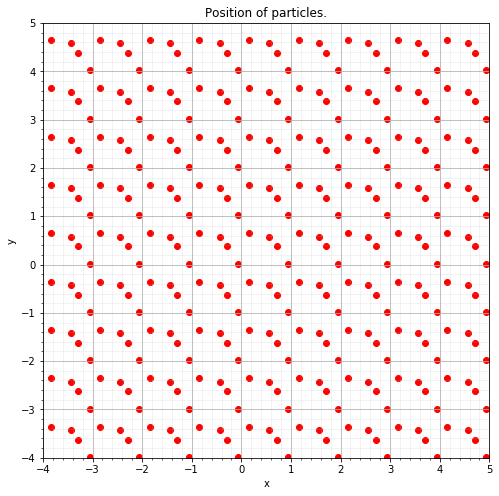

Plotting datapoint  6  with energy  159221708038.44772


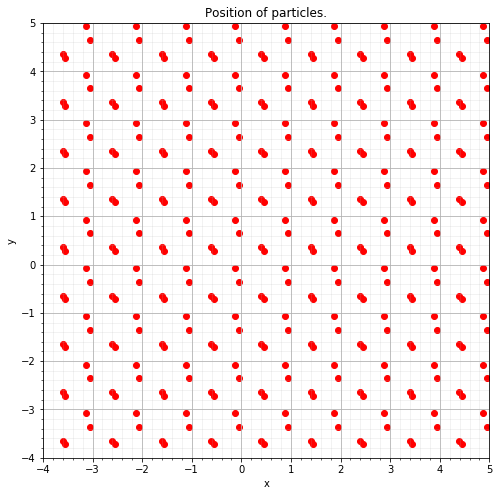

Plotting datapoint  7  with energy  44054730660.17989


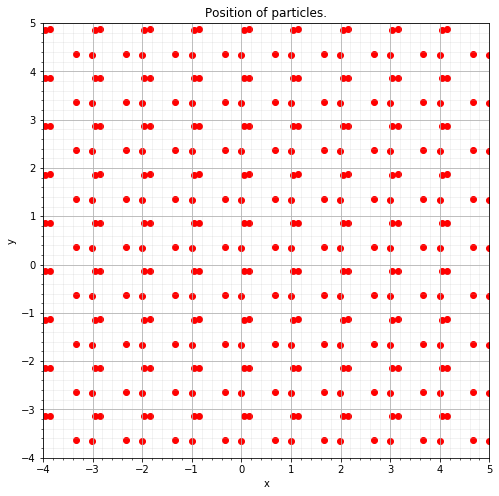

Plotting datapoint  8  with energy  2029158203.3902218


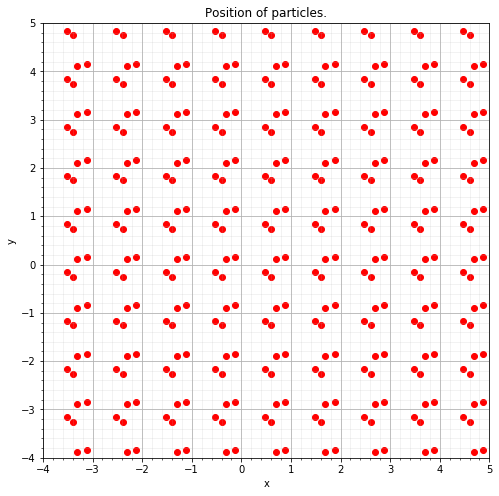

Plotting datapoint  9  with energy  2446403270.028557


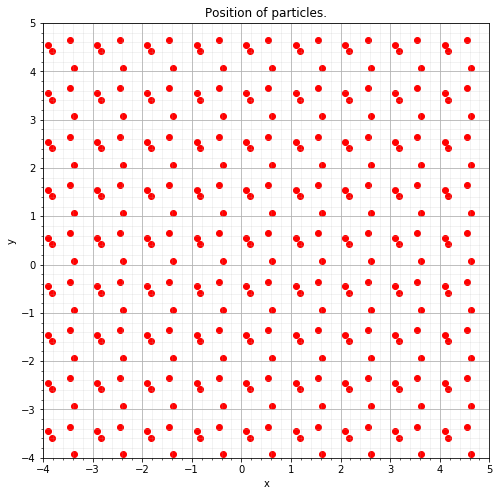

In [8]:
amountToPlot = min([10, numberOfDatapoints])

for i in range(0, amountToPlot):
    print('Plotting datapoint ', i, ' with energy ', data['potentialEnergy'][i])
    plotLatticeFromDataFrame(data, i)

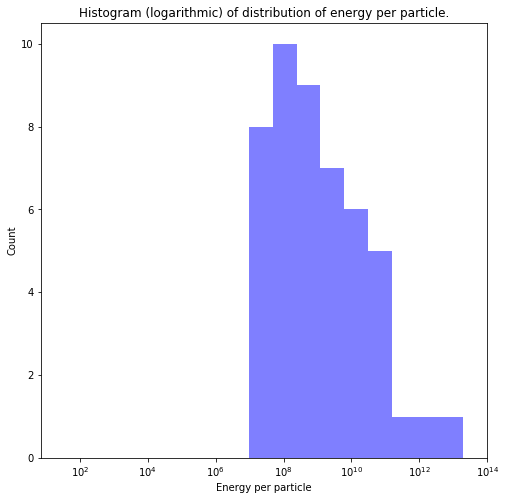

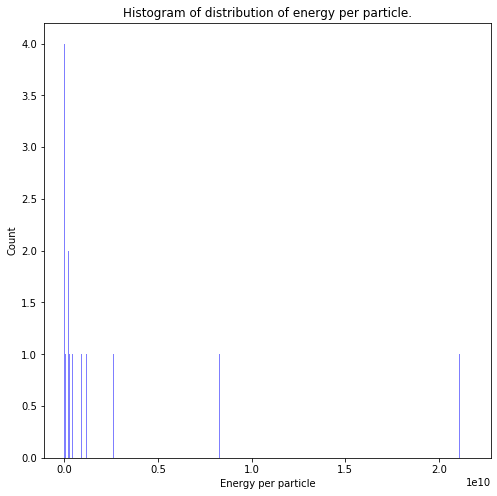

In [9]:
qLow = data['potentialEnergy'].quantile(0)
qHi  = data['potentialEnergy'].quantile(0.99)
dataFiltered = data[(data['potentialEnergy'] < qHi) & (data['potentialEnergy'] > qLow)]
x = dataFiltered['potentialEnergy']
bins = [5**i for i in range(-50, 51)]

fig, ax = plt.subplots(figsize=(8, 8))
n, bins, patches = ax.hist(x, bins = bins, facecolor='blue', alpha=0.5)
ax.set_xscale('log')
ax.set_xlim(max(math.floor(math.log(min(x)) / math.log(10)), 10**-15), math.pow(10, 1 + math.ceil(math.log(max(x)) / math.log(10))))
ax.set_title('Histogram (logarithmic) of distribution of energy per particle.')
ax.set_xlabel('Energy per particle')
ax.set_ylabel('Count')
plt.show()

qLow = data['potentialEnergy'].quantile(0.05)
qHi  = data['potentialEnergy'].quantile(0.80)
dataFiltered = data[(data['potentialEnergy'] < qHi) & (data['potentialEnergy'] > qLow)]
x = dataFiltered['potentialEnergy']
numBins = 1000

fig, ax = plt.subplots(figsize=(8, 8))
n, bins, patches = ax.hist(x, numBins, facecolor='blue', alpha=0.5)
ax.set_title('Histogram of distribution of energy per particle.')
ax.set_xlabel('Energy per particle')
ax.set_ylabel('Count')
plt.show()